In [42]:
import pandas as pd
import datetime
import numpy as np
from integrator import Integrator
pd.options.display.max_columns = 500 

#integrator = Integrator()
#df_on_market, df_off_market = integrator.integrate()


In [43]:
df_off_market = pd.read_pickle('./data/off-market.pkl')
df_on_market = pd.read_pickle('./data/on-market.pkl')

In [61]:
from datetime import date

today = date.today()
d = date(2020,2,8)
delta = today - d
delta.days


df_on_market['liggetid'] = df_on_market['dateAnnounced'].apply(lambda x: (date.today() - x.date()).days)

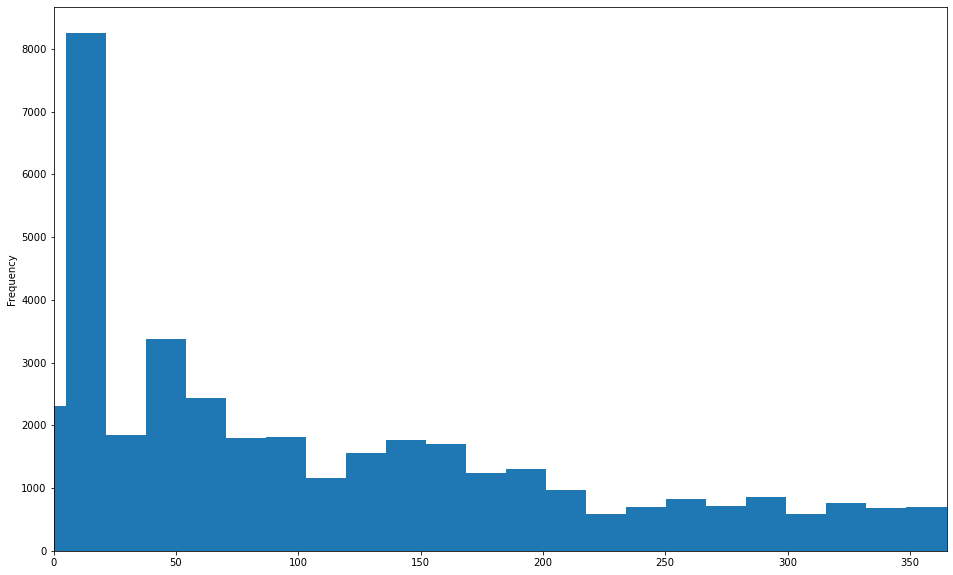

In [93]:
df_hist = df_on_market[df_on_market.liggetid <= 365]
df_hist.liggetid.plot.hist(bins=30, xlim=(0,365), figsize=[16,10])

In [96]:
df_off_market.city.value_counts()[:50]

København S       102
Aarhus C           87
Roskilde           74
Vejle              64
Horsens            59
Næstved            57
Aalborg            53
Ishøj              52
Løkken             48
Frederiksberg      45
Hvidovre           40
København Ø        38
Slagelse           37
København V        36
Silkeborg          35
Sorø               34
Thisted            34
Herning            34
Rødovre            33
Valby              32
Svendborg          32
Hjørring           32
Hadsund            32
Ebeltoft           32
Taastrup           32
Jægerspris         31
Odense C           31
Holbæk             31
Frederiksværk      31
Haderslev          31
Fredericia         30
Kolding            29
Holstebro          28
Vanløse            27
Kongens Lyngby     27
København K        26
København N        26
Gilleleje          25
Glostrup           25
Søborg             24
Nykøbing F         24
Randers NV         24
Juelsminde         24
Nykøbing Sj        23
København SV       23
Charlotten

In [102]:
df_off_market[df_off_market['city'] == 'Roskilde']#['agentChainName'].value_counts() #['itemTypeName']#.value_counts()

,id,itemTypeName,itemType,propertyLink,isFavorite,rating,priceDevelopment,hasOpenHouse,nextOpenHouse,nextOpenHouseSignup,imageLink300X200,energyMark,energyMarkLink,address,postal,city,paymentCash,downPayment,paymentExpenses,paymentGross,paymentNet,areaResidential,numberOfRooms,areaParcel,salesPeriod,redirectLink,openHouseRedirectLink,agentsLogoLink,financing,areaPaymentCash,areaWeighted,uniqueNumber,agentChainName,isArchive,dateRemoved,placeName,canShowSalesPeriodTotal,salesPeriodTotal,dateAnnounced,calculateLoanAgentChain,label,scrapeDate,offMarketDate,saleConfirmed
121,b672f1f262f04003b43db20fb26bd2c6,Ejerlejlighed,300,~/salg/704015974,False,"{'ratings': {'conditionRating': None, 'kitchen...",0%,False,01. jan. 00:00,False,https://pic.boligsiden.dk/property/300x200/1/b...,c,https://sparenergi.dk/forbruger/vaerktoejer/fi...,"Hersegade 7A, st. th",4000,Roskilde,3550000.0,180000.0,3606.0,14361.0,12625.0,110.0,3.0,0.0,0.0,https://www.boligsiden.dk/viderestilling/b672f...,None,https://pic.boligsiden.dk/agent/dfa32648f3c749...,{'link': 'https://raadgivning.boligsiden.dk/bo...,32273.0,110.0,704015974,Ejendomsmæglerfirmaet HENSRIK P/S,False,,,True,0.0,2020-07-31,Nordea,Ny,2020-07-31,2020-08-01,False
204,99ec8c6cda7141f9a8f020be8042e840,Rækkehus,200,~/salg/706526934,False,"{'ratings': {'conditionRating': None, 'kitchen...",0%,True,02. aug. 13:00 - 14:00,False,https://pic.boligsiden.dk/property/300x200/1/9...,a2015,https://sparenergi.dk/forbruger/vaerktoejer/fi...,Toftebuen 2,4000,Roskilde,4300000.0,215000.0,4200.0,17376.0,15274.0,137.0,4.0,349.0,1.0,https://www.boligsiden.dk/viderestilling/99ec8...,None,https://pic.boligsiden.dk/agent/a723479a678c42...,{'link': 'https://raadgivning.boligsiden.dk/bo...,31387.0,0.0,706526934,Lind & Risør A/S,False,,Vindinge,True,0.0,2020-07-30,Nordea,Ny,2020-07-31,2020-08-01,False
213,8b727ddcd4a04ec2a02c269485d57ff1,Andelsbolig,500,~/salg/873491207,False,"{'ratings': {'conditionRating': None, 'kitchen...",-,False,01. jan. 00:00,False,https://pic.boligsiden.dk/property/300x200/1/8...,c,https://sparenergi.dk/forbruger/vaerktoejer/de...,Galpestykket 114,4000,Roskilde,2308431.0,0.0,4407.0,0.0,0.0,135.0,0.0,7180.0,1.0,https://www.boligsiden.dk/viderestilling/8b727...,None,https://pic.boligsiden.dk/agent/12873e5e6b3748...,{'link': 'https://raadgivning.boligsiden.dk/bo...,0.0,0.0,873491207,LokalBolig,False,,Svogerslev,False,0.0,2020-07-30,Nordea,Ny,2020-07-31,2020-08-01,False
260,e5df8addaefb4720884044cc8370e7d6,Ejerlejlighed,300,~/salg/210927731,False,"{'ratings': {'conditionRating': None, 'kitchen...",0%,False,01. jan. 00:00,False,https://pic.boligsiden.dk/property/300x200/1/e...,c,https://sparenergi.dk/forbruger/vaerktoejer/fi...,"Hersegade 7D, st.",4000,Roskilde,1995000.0,100000.0,2329.0,8106.0,7124.0,63.0,2.0,0.0,1.0,https://www.boligsiden.dk/viderestilling/e5df8...,None,https://pic.boligsiden.dk/agent/dfa32648f3c749...,{'link': 'https://raadgivning.boligsiden.dk/bo...,31667.0,63.0,210927731,Ejendomsmæglerfirmaet HENSRIK P/S,False,,,True,378.0,2020-07-30,Nordea,Ny,2020-07-31,2020-08-01,False
343,7f1b3ec2170443cb91577c6da2287a28,Rækkehus,200,~/salg/904093343,False,"{'ratings': {'conditionRating': None, 'kitchen...",0%,True,02. aug. 13:00 - 14:00,False,https://pic.boligsiden.dk/property/300x200/1/7...,a2015,https://sparenergi.dk/forbruger/vaerktoejer/fi...,Toftebuen 4,4000,Roskilde,4200000.0,210000.0,4200.0,16973.0,14920.0,137.0,4.0,349.0,1.0,https://www.boligsiden.dk/viderestilling/7f1b3...,None,https://pic.boligsiden.dk/agent/a723479a678c42...,{'link': 'https://raadgivning.boligsiden.dk/bo...,30657.0,0.0,904093343,Lind & Risør A/S,False,,Vindinge,True,0.0,2020-07-30,Nordea,Ny,2020-07-31,2020-08-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,359859ea0cee412a8541561f8f1067b9,Villa,100,~/salg/717169817,False,"{'ratings': {'conditionRating': None, 'kitchen...",-9%,